# RED NEURONAL DE UN CONJUNTO DE ENFERMEDADES

# IMPORTAR LAS LIBRERIAS

In [6]:
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

import os
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

/home/hexlinux/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hexlinux/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hexlinux/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hexlinux/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

# CARGAR LAS IMAGES 

In [11]:
# dirname = os.path.join(os.getcwd(),'/ImgResize/Arroz/')
# imgpath = os.path.relpath(dirname) + os.sep 
# imgpath = '../ImgResize/Arroz/'

dirname = os.path.join(os.getcwd(),'/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz')
imgpath = dirname + os.sep
prevRoot=''
ImgCant = 0
ImgSize = 200

print("leyendo imagenes de ",imgpath)

leyendo imagenes de  /media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/


In [16]:
images = []
directories = []
dircount = []

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            ImgCant = ImgCant + 1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)

            b = "Leyendo..." + str(ImgCant)
            print (b, end="\r")
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(ImgCant)
                print(root, ImgCant)
                ImgCant=0

dircount.append(ImgCant)
dircount = dircount[1:]
dircount[0] = dircount[0] + 1

print()
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/Anublo 510
/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/Hoja_Blanca 510
/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/Mancha_Marron 510
/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/Saludable 510
/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgResize/Arroz/Tungro 100
Leyendo...509
Directorios leidos: 5
Imagenes en cada directorio [511, 510, 510, 100, 509]
suma Total de imagenes en subdirs: 2140


# CREAR ETIQUETAS Y CLASES

In [20]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  2140


In [21]:
enfermedades=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print('Indice: ', indice ,' Enfermedad:' , name[len(name)-1])
    enfermedades.append(name[len(name)-1])
    indice=indice+1

Indice:  0  Enfermedad: Anublo
Indice:  1  Enfermedad: Hoja_Blanca
Indice:  2  Enfermedad: Mancha_Marron
Indice:  3  Enfermedad: Saludable
Indice:  4  Enfermedad: Tungro


In [22]:
    
y = np.array(labels)
x = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Numero total de salidas: ', nClasses)
print('Clases de salidas: ', classes)  

Numero total de salidas:  5
Clases de salidas:  [0 1 2 3 4]


# CREAMOS CONJUNTO DE ENTRENAMIENTO Y VALIDACIÓN

In [39]:
train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1712, 200, 200, 3) (1712,)
Testing data shape :  (428, 200, 200, 3) (428,)


Text(0.5, 1.0, 'Ground Truth : 1')

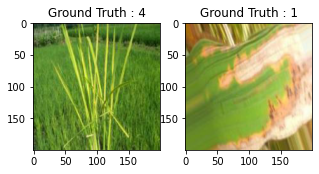

In [40]:
plt.figure(figsize=[5,5])

# Ver la primera imagen para el entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Ver la primera imagen para el testeo
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# PREPROCESAMOS LAS IMAGENES

In [41]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

#  HACEMOS LA CODIFICACIÓN ONE-HOT PARA LA RED

In [42]:
# Cambie las etiquetas de codificación categórica a one-hot
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar el cambio de etiqueta de categoría usando codificación one-hot
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# CREAMOS EL CONJUNTO DE ENTRENAMIENTO Y VALIDACIÓN  

In [43]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [44]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1369, 200, 200, 3) (343, 200, 200, 3) (1369, 5) (343, 5)


# CREAMOS EL MODELO CNN 

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
plant_model = Sequential()
plant_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(resX,resY,3)))
plant_model.add(LeakyReLU(alpha=0.1))
plant_model.add(MaxPooling2D((2, 2),padding='same'))
plant_model.add(Dropout(0.2))
plant_model.add(BatchNormalization())

plant_model.add(Flatten())
plant_model.add(Dense(32, activation='linear'))
plant_model.add(LeakyReLU(alpha=0.1))
plant_model.add(Dropout(0.2))
plant_model.add(BatchNormalization())

plant_model.add(Dense(nClasses, activation='softmax'))

In [ ]:
plant_model.summary()

In [ ]:
plant_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# ENTRENAMOS EL MODELO PARA QUE APRENDA A CLASIFICAR LAS      IMAGENES

In [ ]:
plant_train = plant_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(valid_X, valid_label))

# GUARDAMOS EL MODELO

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar  (verbose estaba en 1)
plant_model.save('/media/hexlinux/ROM/TusCultivos/P-TusCultivos/Models/plant_models_R200_E50_B50.h5py')

# EVALUAMOS LA RED NEURONAL

In [ ]:
test_eval = plant_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
print("Porcentaje de fallos:  %.2f%%" % (test_eval[0]*100))
print("Porcentaje de acierto:  %.2f%%" % (test_eval[1]*100))

In [ ]:
history_dict = plant_train.history
print(history_dict.keys())

In [ ]:
accuracy = plant_train.history['accuracy']
val_accuracy = plant_train.history['val_accuracy']
loss = plant_train.history['loss']
val_loss = plant_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Aciertos de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Aciertos de validacion')
plt.title('Aciertos de entrenamiento y validacion')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Fallos en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Fallos en validacion')
plt.title('Fallos de entrenamiento y validacion')
plt.legend()
plt.show()

In [ ]:
predicted_classes_test = plant_model.predict(test_X)

In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes_test:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

NameError: name 'predicted_classes' is not defined

# LA RED APRENDE A MEJOR DE LOS ERRORES

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(resX,resY,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(enfermedades[predicted_classes[correct]],
                                                    enfermedades[test_Y[correct]]))

    plt.tight_layout()

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(resX,resY,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(enfermedades[predicted_classes[incorrect]],
                                                    enfermedades[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

# PREDECIR LAS IMAGENES

In [ ]:
from skimage.transform import resize
from tabulate import tabulate 

# AQUI ESPECIFICAMOS UNAS IMAGENES
plant_model = load_model('/media/hexlinux/ROM/TusCultivos/P-TusCultivos/Models/plant_models_R200_E50_B50.h5py')

enfermedades = ['Anublo','Hoja_Blanca','Mancha_Marron','Saludable','Tungro']

# PREDECIR ENFERMEDAD DE UNA SOLA IMAGEN

In [ ]:
images=[]

imgpath = '/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgTest/Blast/blast_31_output.jpg'

image = plt.imread(imgpath,0)
image_resized = resize(image, (resX, resY),anti_aliasing=True,clip=False,preserve_range=True)
images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predict = plant_model.predict(test_X)
print(predict * 100)
i = np.argmax(predict[0])
Porcentaje = np.max(predict)

print('La enfermedad es: ', enfermedades[i], ' con un : %.2f ' % (Porcentaje * 100))

# PREDECIR ENFERMEDADES VARIAS IMAGENES

In [ ]:
path = '/media/hexlinux/ROM/TusCultivos/P-TusCultivos/ImgTest/Tungro/'

cant_Enfermedades =  [0] * len(enfermedades)
images = []

filedir = os.listdir(path)
filenames = []
for fileimage in filedir:
  filenames.append(path + str(fileimage))

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (resX, resY),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.


predicted_classes = plant_model.predict(test_X)

for img_tagged in predicted_classes:
  a = img_tagged.tolist().index(max(img_tagged))
  cant_Enfermedades[a] += 1
  pass

value = path.split(os.sep)
print('Leyendo imagenes de: ', value[-2])
print('Cantida de imagenes leidas: ', len(images),'\n')

h_Table = ['Enfermedad','Cantidad']
v_Table = zip(enfermedades,cant_Enfermedades)


print(tabulate(v_Table,headers = h_Table))

print(' \n Efectividad: ', ' con un : %.2f ' % ( (max(cant_Enfermedades)/len(images)) * 100))

# for i, img_tagged in enumerate(predicted_classes):
#     #plt.imshow(plt.imread(filenames[i],0))
#     #plt.show()
#     print(filedir[i], " \t ",enfermedades[img_tagged.tolist().index(max(img_tagged))])
